In [1]:
from SimPEG import Mesh, Maps, Utils
from simpegEM1D import (
    get_vertical_discretization_time, EM1DSurveyTD, Utils1D,
    get_vertical_discretization_frequency,
    EM1D, set_mesh_1d
)

import numpy as np
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# VTEM Waveform
time_channels = np.vstack([
    [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    [470e-7, 598e-7, 726e-7, 886e-7, 1118e-7, 1454e-7, 1852e-7, 2344e-7, 2952e-7, 3706e-7, 4644e-7, 5814e-7, 7278e-7, 9112e-7, 11170e-7, 14292e-7, 17912e-7, 22460e-7, 28174e-7, 35356e-7, 44388e-7, 55750e-7, 7.00e-03, 8.80e-03]
]).T

waveform = np.vstack([
    np.r_[-10, -9.29, -8.41, -7.26, -5.28, -3.62, -2.33, -0.62, 0.00, 0.0266, 0.0276, 0.0286, 10.000]*1e-3,
    np.r_[0, 20, 40, 60, 80, 90, 95, 99, 100, 1.53, 0.566, 0.000, 0.000]/100.
]).T

time_input_currents = waveform[:-1, 0]
input_currents = waveform[:-1, 1]
times = time_channels[:, 1]
hz = get_vertical_discretization_time(times, sigma_background=0.01, facter_tmax=1, n_layer=40)

In [4]:
##TEMFAST WAVEFORM
temfast_data = pd.read_table(os.path.sep.join(['./', 'dados.txt']))  #Load data file
waveformtem = np.vstack([
    np.r_[-3.44e-7, -3.28e-7, -3.20e-7, -3.04e-7, -2.88e-7, -2.24e-7, -1.92e-7, -9.60e-8, -8.80e-8, 0.0, 1.12e-7, 2.24e-7, 
         3.52e-7, 4.80e-7, 6.00e-7, 7.60e-7, 1.10e-6, 1.22e-6, 1.46e-5],
    np.r_[0, 30, 50, 62, 72, 92, 96, 99, 100, 100, 85, 60, 40, 31, 20, 11, 2,  0, 0]/100.
]).T

tem_times = waveformtem[:, 0]
tem_currents = waveformtem[:, 1]
time_channels_tem = (temfast_data.Time[:].values)*1e-6 

In [11]:
#trapezoidal -Seogi

input_currents_trap = np.array([0, 1, 1, 0], dtype=float)
time_input_currents_trap = np.array([0, 1e-4, 2e-4, 2e-4+8e-6])

In [16]:
print(time_input_currents_trap)

[0.       0.0001   0.0002   0.000208]


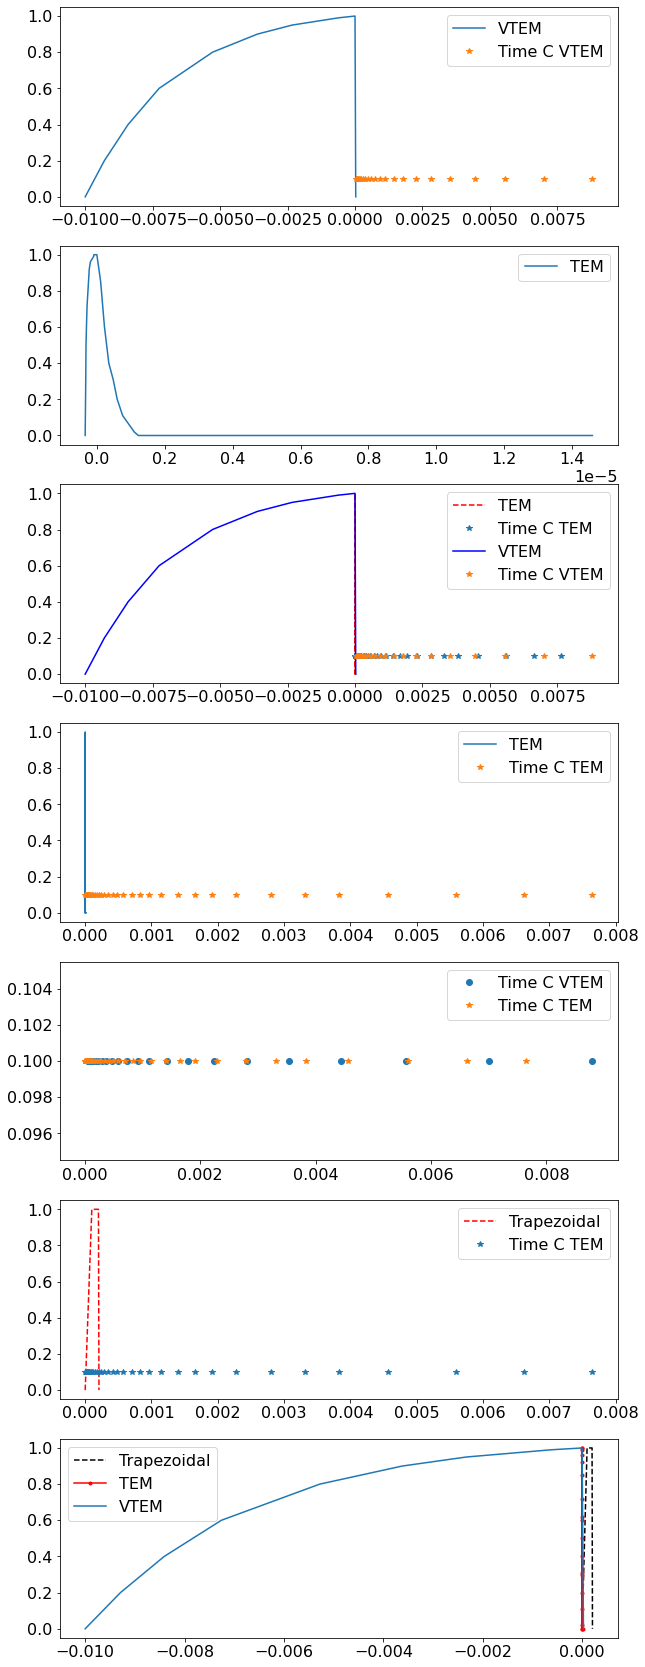

In [24]:
fig, axs = subplots(7,1, figsize=(10, 30))
axs[0].plot(time_input_currents, input_currents,label='VTEM')
axs[0].plot(times,0.1*np.ones(len(times)),'*',label='Time C VTEM')
axs[0].legend()

axs[1].plot(tem_times, tem_currents,label = 'TEM')
#axs[0,1].plot(time_channels_tem,0.1*np.ones(len(time_channels_tem)),'*',label='Time C TEM')
axs[1].legend()


axs[2].plot(tem_times, tem_currents,'--r',label='TEM')
axs[2].plot(time_channels_tem,0.1*np.ones(len(time_channels_tem)),'*',label = 'Time C TEM')
axs[2].plot(time_input_currents, input_currents, 'b-',label='VTEM')
axs[2].plot(times,0.1*np.ones(len(times)),'*',label='Time C VTEM')
axs[2].legend()

axs[3].plot(tem_times, tem_currents,label = 'TEM')
axs[3].plot(time_channels_tem,0.1*np.ones(len(time_channels_tem)),'*',label='Time C TEM')
axs[3].legend()

axs[4].plot(times,0.1*np.ones(len(times)),'o',label='Time C VTEM')
axs[4].plot(time_channels_tem,0.1*np.ones(len(time_channels_tem)),'*',label='Time C TEM')
axs[4].legend()


axs[5].plot(time_input_currents_trap, input_currents_trap,'--r',label='Trapezoidal')
axs[5].plot(time_channels_tem,0.1*np.ones(len(time_channels_tem)),'*',label = 'Time C TEM')
axs[5].legend()


axs[6].plot(time_input_currents_trap, input_currents_trap,'--k',label='Trapezoidal')
#axs[5].plot(time_channels_tem,0.1*np.ones(len(time_channels_tem)),'*',label = 'Time C TEM')
axs[6].plot(tem_times, tem_currents,'.-r',label = 'TEM')
axs[6].plot(time_input_currents, input_currents,'-',label='VTEM')
axs[6].legend()

# axs[3].plot(tem_times, tem_currents)
# axs[3].plot(time_channels_tem,0.1*np.ones(len(time_channels_tem)),'*')

plt.rcParams.update({'font.size': 16})

# Conclusions from image
The time channels from both are similar but the range in the waveform is completely different
## Setting both waveforms to have time zero when the current is one...
In VTEM the times in waveform are between -1e-2 and 2.86e-5. 
In TEMFAST waveform the times are between -3.44e-7 and 1.46e-5 .
In the Seogi example, the times are between 0 and 2.08e-4 and do not have negative values (why doens't have the time zero when the current is one?)

In TEMFAST waveform never arrives to 1e-4.

Time channels VTEM : 4.7e-5 to 8.8e-3
Time Channels TemFAST : 4.06e-6 to 7.65e-3

The problem is definitely in defining the times in the waveform because the time channels are similar